In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline
from pandas_datareader import data as pdr
from datetime import datetime
import yfinance as yf

In [2]:
yf.pdr_override()
y_symbols = ['TSLA']
startdate = datetime(2017,2,27)
enddate = datetime(2022,2,25)
df_tesla = pdr.get_data_yahoo(y_symbols,start=startdate,end = enddate)

[*********************100%***********************]  1 of 1 completed


In [3]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27 00:00:00-05:00,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28 00:00:00-05:00,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01 00:00:00-05:00,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02 00:00:00-05:00,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03 00:00:00-05:00,16.716000,16.793333,16.600000,16.771334,16.771334,43791000


How to split time from a date and giving date column as a index column

In [4]:
df_tesla = df_tesla.reset_index()

In [5]:
df_tesla['Date'] = pd.to_datetime(df_tesla['Date'])

In [6]:
df_tesla['Date'] = df_tesla["Date"].dt.date

In [7]:
df_tesla = df_tesla.set_index(['Date'],drop = True)

In [8]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000
...,...,...,...,...,...,...
2022-02-17,304.420013,306.166656,291.366669,292.116669,292.116669,55178400
2022-02-18,295.333344,295.623322,279.203339,285.660004,285.660004,68501700
2022-02-22,278.043335,285.576660,267.033325,273.843323,273.843323,83288100


# Simple moving average
It is used to smoothing the graph

<AxesSubplot:xlabel='Date'>

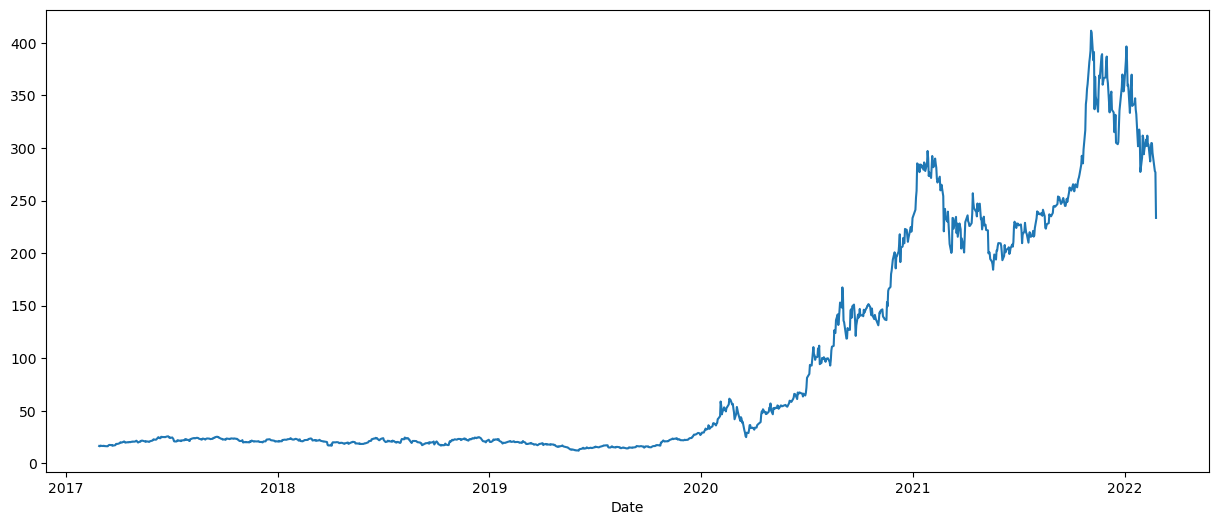

In [9]:
df_tesla['Open'].plot(figsize = (15,6))

In [10]:
df_tesla['Open : 10 days rolling'] = df_tesla['Open'].rolling(window=10,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

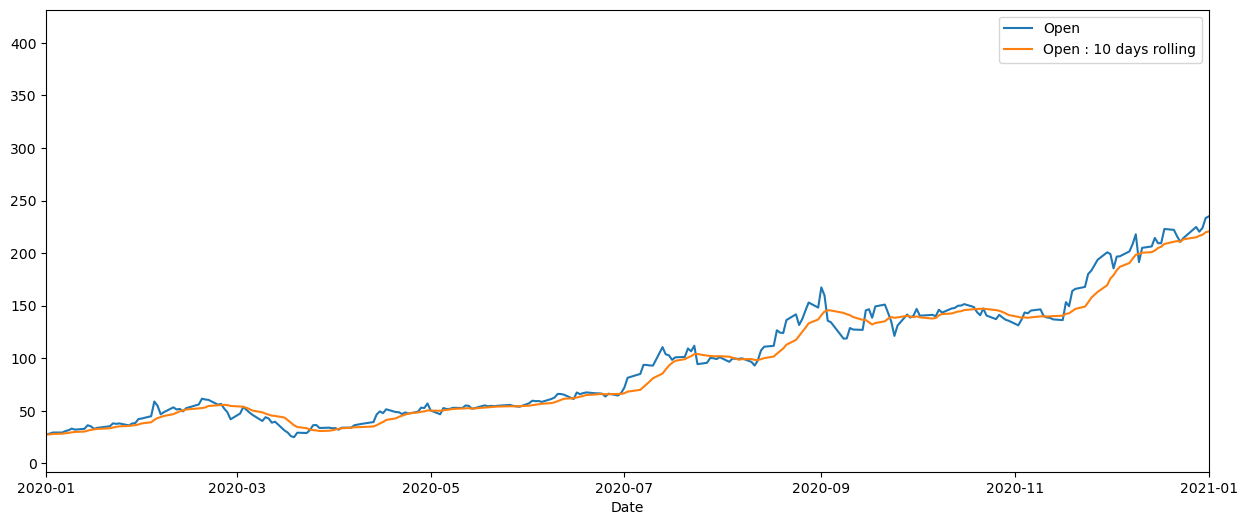

In [11]:
df_tesla[['Open','Open : 10 days rolling']].plot(xlim=['2020-01-01' , '2021-01-01'],figsize = (15,6))

In [12]:
df_tesla['Open : 30 days rolling'] = df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open : 50 days rolling'] = df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

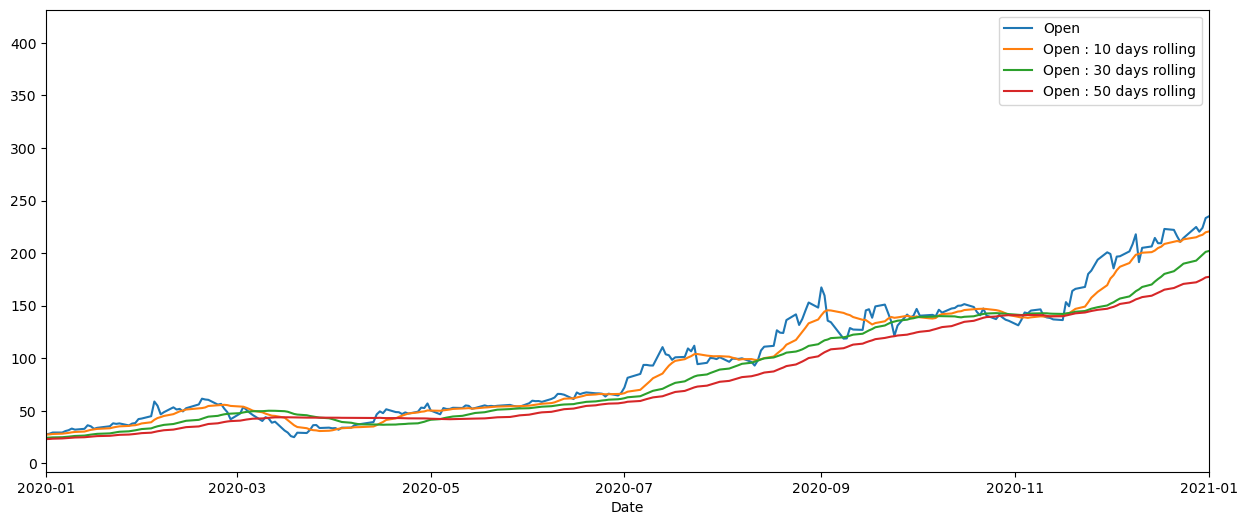

In [13]:
df_tesla[['Open','Open : 10 days rolling','Open : 30 days rolling','Open : 50 days rolling']].plot(xlim=['2020-01-01' , '2021-01-01'],figsize = (15,6))

<AxesSubplot:xlabel='Date'>

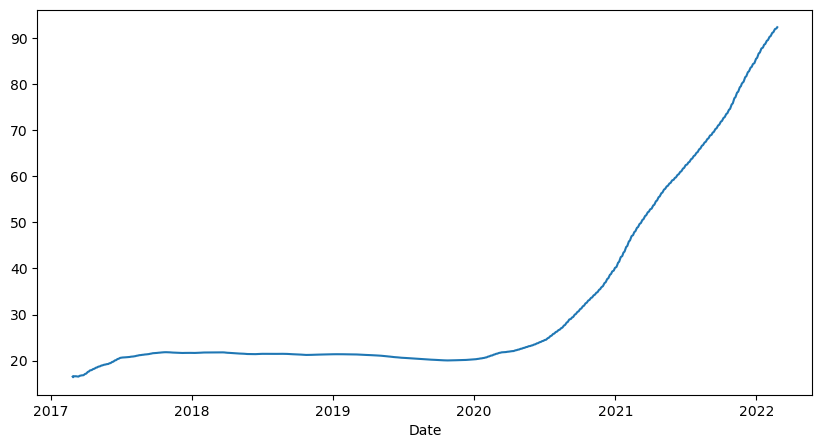

In [14]:
# Cumulative Moving avg
## .expanding() --> function
df_tesla['Open'].expanding().mean().plot(figsize = (10,5))

In [19]:
# EWM Exponencial  moving average
# let's smoothing factor - 0.1
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

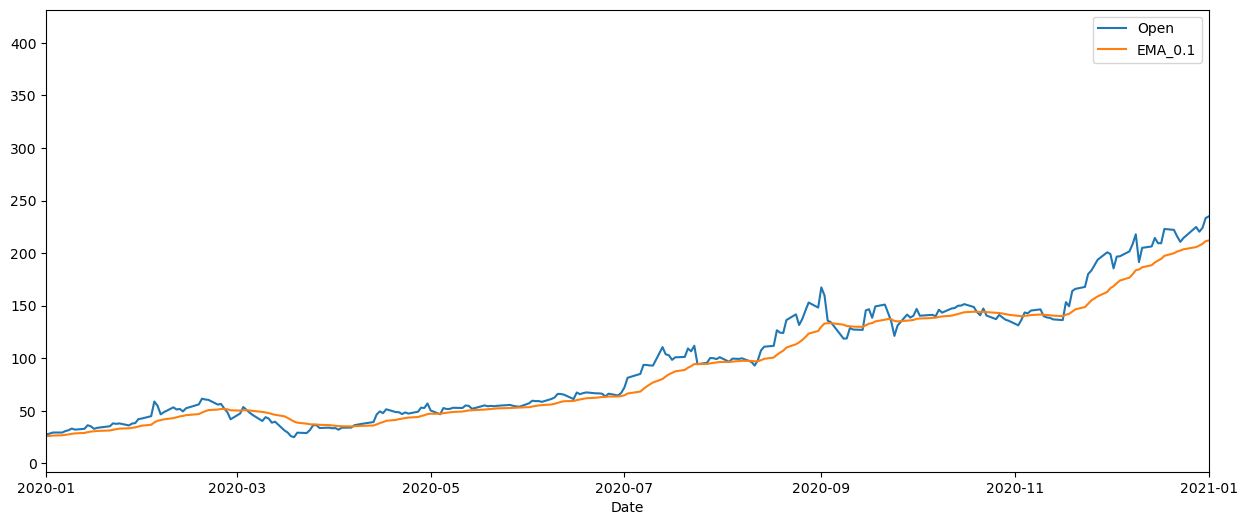

In [24]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2020-01-01' , '2021-01-01'],figsize = (15,6))


In [25]:
df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha=0.3,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

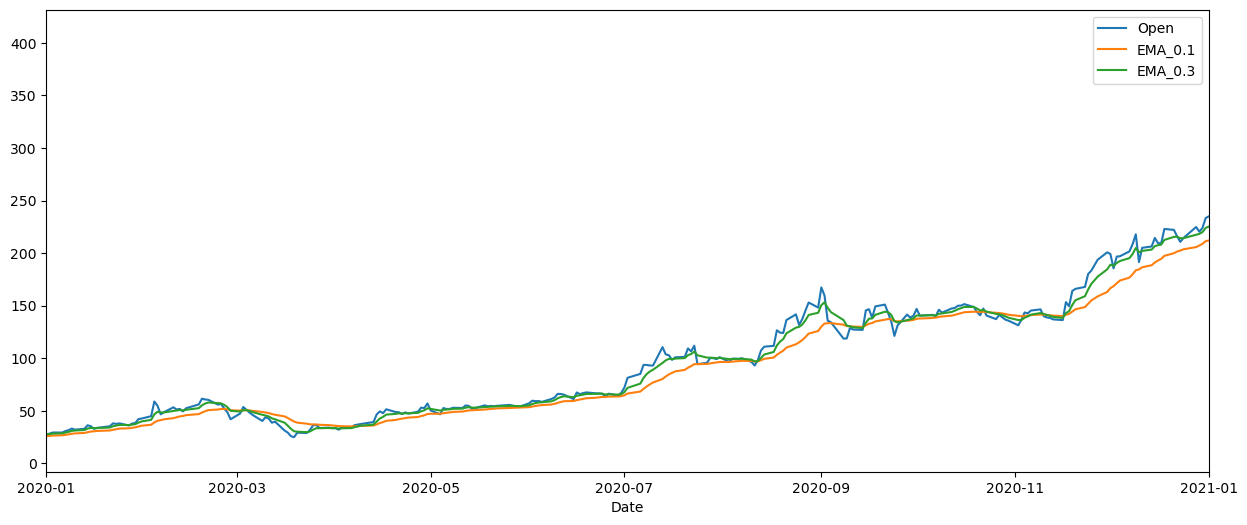

In [26]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01' , '2021-01-01'],figsize = (15,6))